In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/gdrive


In [ ]:
import pandas as pd
import numpy as np
%matplotlib inline

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
!pip install pmdarima
from pmdarima import auto_arima

In [ ]:
df = pd.read_excel('/content/gdrive/My Drive/Sample/Month_Wise_Punjab.xlsx', index_col='arrival_date',parse_dates=True)
df.index.freq='MS'

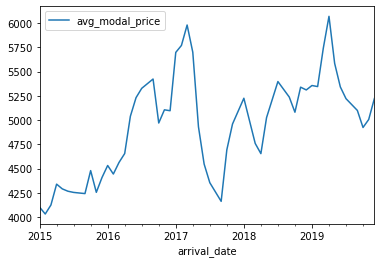

In [ ]:
df.plot()

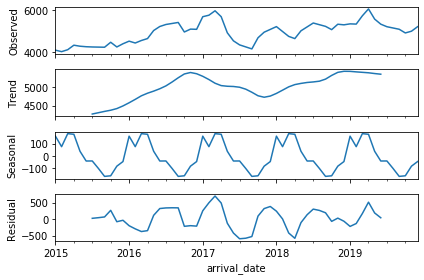

In [ ]:
result = seasonal_decompose(df['avg_modal_price'],model='add')
result.plot();

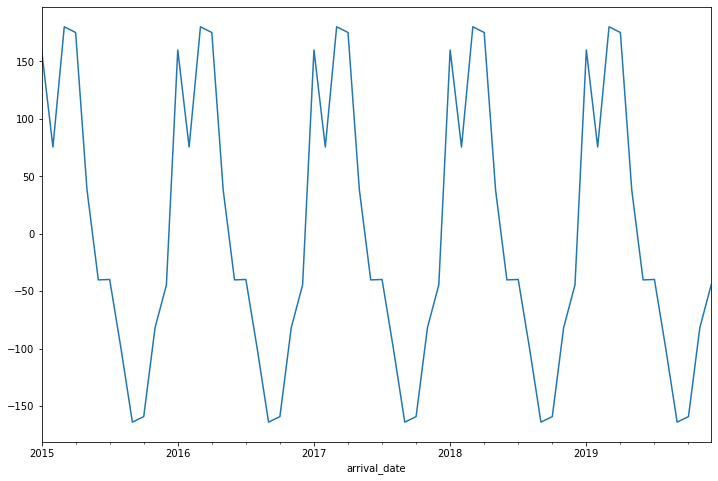

In [ ]:
result.seasonal.plot(figsize=(12,8))

In [ ]:
auto_arima(df['avg_modal_price'],seasonal=True,m=12).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   60
Model:             SARIMAX(2, 1, 1)x(2, 0, 0, 12)   Log Likelihood                -395.283
Date:                            Sat, 25 Jan 2020   AIC                            804.567
Time:                                    10:41:06   BIC                            819.110
Sample:                                         0   HQIC                           810.244
                                             - 60                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      3.7924      2.355      1.610      0.107      -0.824       8.409
ar.L1          1.1925      0.159      7.493      0.000       0.881       1.504
ar.L2         -0.4036      0.139     -2.906      0.004      -0.676      -0.131
ma.L1         -0.9999      0.157     -6.374      0.000      -1.307      -0.692
ar.S.L12      -0.2566      0.143     -1.794      0.073      -0.537       0.024
ar.S.L24       0.3017      0.161      1.875      0.061      -0.014       0.617
sigma2      3.401e+04    4.6e-06   7.39e+09      0.000     3.4e+04     3.4e+04
===================================================================================
Ljung-Box (Q):                       23.37   Jarque-Bera (JB):                 3.30
Prob(Q):                              0.98   Prob(JB):                         0.19
Heteroskedasticity (H):               1.16   Skew:                             0.40
Prob(H) (two-sided):                  0.75   Kurtosis:                         3.84
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 9.91e+26. Standard errors may be unstable.
"""

In [ ]:
len(df)

60

60

In [ ]:
train = df.iloc[:50]
test = df.iloc[50:]

In [ ]:
model = SARIMAX(train['avg_modal_price'],order=(2, 1, 1),seasonal_order=(2, 0, 0, 12))
results = model.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    avg_modal_price   No. Observations:                   50
Model:             SARIMAX(2, 1, 1)x(2, 0, 0, 12)   Log Likelihood                -330.537
Date:                            Sat, 25 Jan 2020   AIC                            673.074
Time:                                    10:38:31   BIC                            684.424
Sample:                                01-01-2015   HQIC                           677.380
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3681      0.973     -0.378      0.705      -2.275       1.538
ar.L2          0.3067      0.271      1.131      0.258      -0.225       0.838
ma.L1          0.6764      0.982      0.689      0.491      -1.248       2.600
ar.S.L12      -0.2409      0.132     -1.828      0.068      -0.499       0.017
ar.S.L24       0.3146      0.200      1.571      0.116      -0.078       0.707
sigma2      3.916e+04   8374.690      4.677      0.000    2.28e+04    5.56e+04
===================================================================================
Ljung-Box (Q):                       25.60   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.96   Prob(JB):                         0.17
Heteroskedasticity (H):               1.00   Skew:                            -0.30
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                    avg_modal_price   No. Observations:                   50
Model:             SARIMAX(2, 1, 1)x(2, 0, 0, 12)   Log Likelihood                -330.537
Date:                            Sat, 25 Jan 2020   AIC                            673.074
Time:                                    10:39:03   BIC                            684.424
Sample:                                01-01-2015   HQIC                           677.380
                                     - 02-01-2019                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.3681      0.973     -0.378      0.705      -2.275       1.538
ar.L2          0.3067      0.271      1.131      0.258      -0.225       0.838
ma.L1          0.6764      0.982      0.689      0.491      -1.248       2.600
ar.S.L12      -0.2409      0.132     -1.828      0.068      -0.499       0.017
ar.S.L24       0.3146      0.200      1.571      0.116      -0.078       0.707
sigma2      3.916e+04   8374.690      4.677      0.000    2.28e+04    5.56e+04
===================================================================================
Ljung-Box (Q):                       25.60   Jarque-Bera (JB):                 3.60
Prob(Q):                              0.96   Prob(JB):                         0.17
Heteroskedasticity (H):               1.00   Skew:                            -0.30
Prob(H) (two-sided):                  0.99   Kurtosis:                         4.18
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
start = len(train)
end = len(train) + len(test) - 1

predictions = results.predict(start,end,typ='levels').rename('Predictions')

In [ ]:
predictions

2019-03-01    5439.799671
2019-04-01    5360.143734
2019-05-01    5026.503403
2019-06-01    4856.877376
2019-07-01    4752.490716
2019-08-01    4739.978218
2019-09-01    4729.777266
2019-10-01    4933.682019
2019-11-01    4955.570983
2019-12-01    5003.785176
Freq: MS, Name: Predictions, dtype: float64

2019-03-01    5439.799671
2019-04-01    5360.143734
2019-05-01    5026.503403
2019-06-01    4856.877376
2019-07-01    4752.490716
2019-08-01    4739.978218
2019-09-01    4729.777266
2019-10-01    4933.682019
2019-11-01    4955.570983
2019-12-01    5003.785176
Freq: MS, Name: Predictions, dtype: float64

In [ ]:
test

,state,district,market,avg_modal_price
arrival_date,,,,
2019-03-01,Punjab,Patiala,Patiala,5741.600000
2019-04-01,Punjab,Patiala,Patiala,6069.772727
2019-05-01,Punjab,Patiala,Patiala,5585.243506
2019-06-01,Punjab,Patiala,Patiala,5342.978896
2019-07-01,Punjab,Patiala,Patiala,5221.846590
2019-08-01,Punjab,Patiala,Patiala,5161.280438
2019-09-01,Punjab,Patiala,Patiala,5100.714285
2019-10-01,Punjab,Patiala,Patiala,4925.000000
2019-11-01,Punjab,Patiala,Patiala,5007.222200


,state,district,market,avg_modal_price
arrival_date,,,,
2019-03-01,Punjab,Patiala,Patiala,5741.600000
2019-04-01,Punjab,Patiala,Patiala,6069.772727
2019-05-01,Punjab,Patiala,Patiala,5585.243506
2019-06-01,Punjab,Patiala,Patiala,5342.978896
2019-07-01,Punjab,Patiala,Patiala,5221.846590
2019-08-01,Punjab,Patiala,Patiala,5161.280438
2019-09-01,Punjab,Patiala,Patiala,5100.714285
2019-10-01,Punjab,Patiala,Patiala,4925.000000
2019-11-01,Punjab,Patiala,Patiala,5007.222200


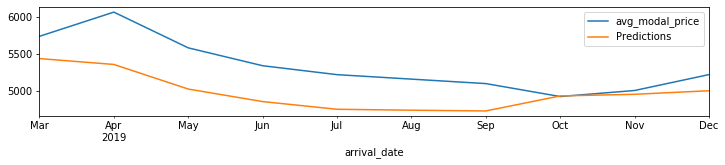

In [ ]:
test['avg_modal_price'].plot(legend=True,figsize=(12,2))
predictions.plot(legend=True)

In [ ]:
from statsmodels.tools.eval_measures import rmse

In [ ]:
error = rmse(test['avg_modal_price'],predictions)
error

415.84401619726833

415.84401619726833

In [ ]:
test['avg_modal_price'].mean()

5337.851578400001

5337.851578400001

In [ ]:
predictions.mean()

4979.860856145689

4979.860856145689

In [ ]:
model = SARIMAX(df['avg_modal_price'],order=(2, 1, 1),seasonal_order=(2, 0, 0, 12))
results = model.fit()

In [ ]:
fcast = results.predict(len(df),len(df)+5,typ='levels').rename('SARIMA FORECAST')

In [ ]:
fcast

2020-01-01    5345.376762
2020-02-01    5302.444084
2020-03-01    5134.475029
2020-04-01    5012.217441
2020-05-01    5236.321600
2020-06-01    5344.994721
Freq: MS, Name: SARIMA FORECAST, dtype: float64

2020-01-01    5345.376762
2020-02-01    5302.444084
2020-03-01    5134.475029
2020-04-01    5012.217441
2020-05-01    5236.321600
2020-06-01    5344.994721
Freq: MS, Name: SARIMA FORECAST, dtype: float64

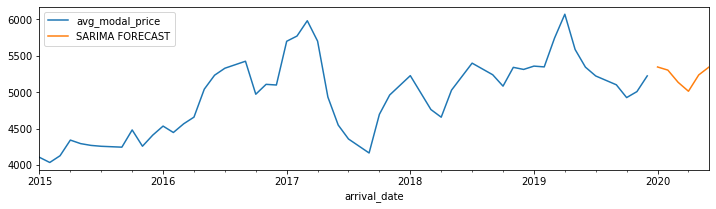

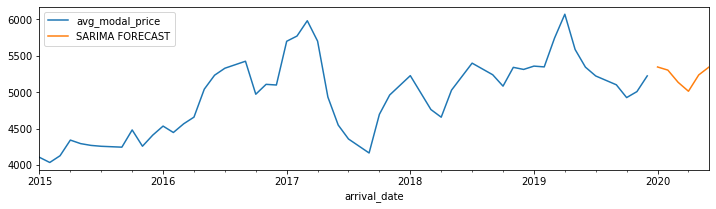

In [ ]:
df['avg_modal_price'].plot(legend=True,figsize=(12,3))
fcast.plot(legend='True')

In [ ]:
from pandas import DataFrame
export_csv = fcast.to_csv ('/content/gdrive/My Drive/Output/export1.csv', index = None, header=True)